In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import linregress
from scipy.stats import linregress

In [5]:
# Create a set of random lat and long combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_longs)

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mataura pf
vila franca do campo pt
auki sb
victoria sc
forestville ca
yulara au
jamestown sh
mahebourg mu
castro cl
ponta do sol cv
port alfred za
keti bandar pk
rikitea pf
cherskiy ru
iqaluit ca
new norfolk au
burns lake ca
punta arenas cl
marzuq ly
albany au
fort nelson ca
barrow us
luderitz na
bredasdorp za
yar-sale ru
tautira pf
vostok ru
dingle ie
hobart au
yellowknife ca
klaksvik fo
sabha ly
georgetown sh
duluth us
avarua ck
benito juarez mx
jamestown sh
belushya guba ru
saldanha za
kapaa us
port alfred za
albany au
tuktoyaktuk ca
sao gabriel da cachoeira br
hobart au
atuona pf
puerto ayora ec
amderma ru
rudnogorsk ru
constitucion mx
belyy yar ru
busselton au
nanga eboko cm
lucapa ao
atuona pf
airai pw
aklavik ca
chuy uy
cidreira br
torbay ca
olafsvik is
hithadhoo mv
east london za
nelson bay au
albany au
ushuaia ar
bluff nz
okhotsk ru
xai-xai mz
kahului us
port alfred za
illoqqortoormiut gl
karratha au
bluff nz
port alfred za
hualmay pe
cape town za
fairbanks us
kapaa us
valreas

In [8]:
# create a list for holding the cities.
cities = []
#identify the nearest city for each lat long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #if the city is unique then we will at it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

595

In [9]:
cities

['mataura',
 'vila franca do campo',
 'auki',
 'victoria',
 'forestville',
 'yulara',
 'jamestown',
 'mahebourg',
 'castro',
 'ponta do sol',
 'port alfred',
 'keti bandar',
 'rikitea',
 'cherskiy',
 'iqaluit',
 'new norfolk',
 'burns lake',
 'punta arenas',
 'marzuq',
 'albany',
 'fort nelson',
 'barrow',
 'luderitz',
 'bredasdorp',
 'yar-sale',
 'tautira',
 'vostok',
 'dingle',
 'hobart',
 'yellowknife',
 'klaksvik',
 'sabha',
 'georgetown',
 'duluth',
 'avarua',
 'benito juarez',
 'belushya guba',
 'saldanha',
 'kapaa',
 'tuktoyaktuk',
 'sao gabriel da cachoeira',
 'atuona',
 'puerto ayora',
 'amderma',
 'rudnogorsk',
 'constitucion',
 'belyy yar',
 'busselton',
 'nanga eboko',
 'lucapa',
 'airai',
 'aklavik',
 'chuy',
 'cidreira',
 'torbay',
 'olafsvik',
 'hithadhoo',
 'east london',
 'nelson bay',
 'ushuaia',
 'bluff',
 'okhotsk',
 'xai-xai',
 'kahului',
 'illoqqortoormiut',
 'karratha',
 'hualmay',
 'cape town',
 'fairbanks',
 'valreas',
 'touros',
 'san pedro',
 'alyangula',
 'p

In [10]:
#import the requests library
import requests
#import the api key
from config import weather_api_key

In [11]:
#starting URL for weather map api call.(from website)
#wurl = "api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid="+ weather_api_key
#print(wurl)

In [12]:
# Starting URL for Weather Map API Call.(from module)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b11ddb4c8cc0761bb3d8b478bdda89d8


In [13]:
# create an empty list to hold weather data
city_data = []
#print the beginning of the loging.
print("Beginning Data Retrieval    ")
print("----------------------------")

#create counter
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | vila franca do campo
Processing Record 3 of Set 1 | auki
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | forestville
Processing Record 6 of Set 1 | yulara
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | keti bandar
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | burns lake
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | marzuq
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | fort nelson
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set

In [14]:
len(city_data)

545

In [15]:
#turn series into data frame
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#reorder columns
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-02-27 13:34:14,-46.1927,168.8643,39.34,98,33,2.77
1,Vila Franca Do Campo,PT,2022-02-27 13:34:15,37.7167,-25.4333,63.82,82,95,16.93
2,Auki,SB,2022-02-27 13:34:15,-8.7676,160.7034,77.02,87,100,4.70
3,Victoria,HK,2022-02-27 13:34:15,22.2855,114.1577,66.11,83,90,14.67
4,Forestville,US,2022-02-27 13:34:15,38.8451,-76.8750,39.11,45,100,4.63
...,...,...,...,...,...,...,...,...,...
540,Walvis Bay,NA,2022-02-27 13:47:33,-22.9575,14.5053,69.10,65,5,14.52
541,Olinda,BR,2022-02-27 13:47:34,-8.0089,-34.8553,84.15,65,35,11.63
542,Kuteynykove,UA,2022-02-27 13:47:34,47.8123,38.2882,36.75,61,99,11.92
543,Hofn,IS,2022-02-27 13:47:34,64.2539,-15.2082,34.99,66,85,6.20


In [17]:
#Extract relevant fields from the Data Frame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

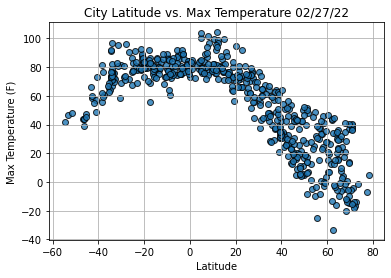

In [25]:
#scatter plot - Lat vs max temp
plt.scatter(lats, 
            max_temps, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label = "Cities")
plt.title (f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()


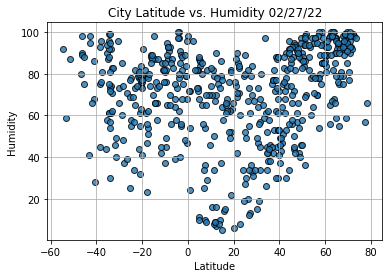

In [31]:
#scatter plot - Lat vs humidity
plt.scatter(lats, 
            humidity, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label = "Cities")
plt.title (f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

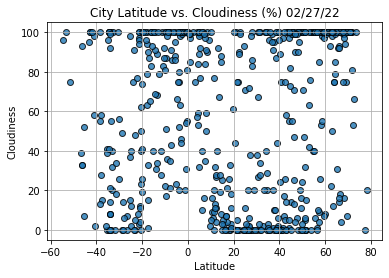

In [32]:
#scatter plot - Lat vs cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label = "Cities")
plt.title (f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

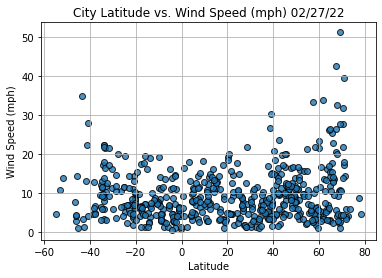

In [33]:
#scatter plot - Lat vs windspeed
plt.scatter(lats, 
            wind_speed, 
            edgecolors="black", 
            linewidths=1, marker="o",
            alpha=0.8, label = "Cities")
plt.title (f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13

City                     Cherskiy
Country                        RU
Date          2022-02-27 13:34:17
Lat                         68.75
Lng                         161.3
Max Temp                     0.46
Humidity                       97
Cloudiness                    100
Wind Speed                  10.67
Name: 13, dtype: object

In [43]:
#pulling lats greater than 0 filter 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Vila Franca Do Campo,PT,2022-02-27 13:34:15,37.7167,-25.4333,63.82,82,95,16.93
3,Victoria,HK,2022-02-27 13:34:15,22.2855,114.1577,66.11,83,90,14.67
4,Forestville,US,2022-02-27 13:34:15,38.8451,-76.8750,39.11,45,100,4.63
6,Jamestown,US,2022-02-27 13:30:42,42.0970,-79.2353,25.57,83,7,16.49
9,Ponta Do Sol,PT,2022-02-27 13:34:17,32.6667,-17.1000,67.71,65,2,1.43


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

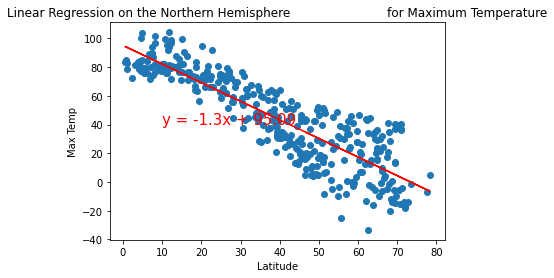

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

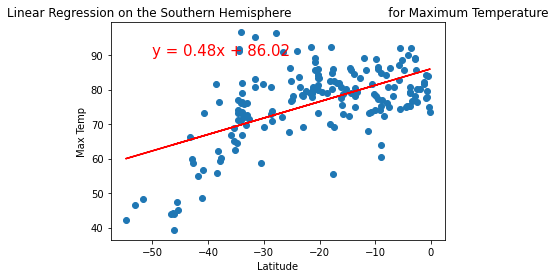

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

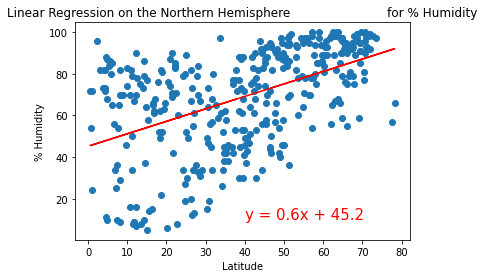

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

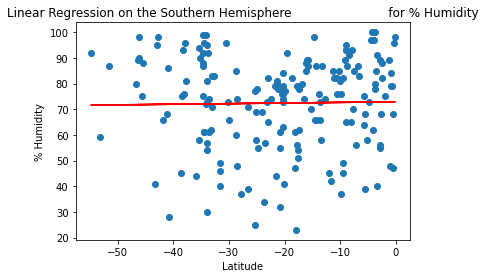

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

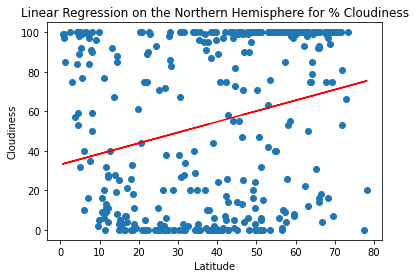

In [56]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       'Cloudiness',(-50,15))

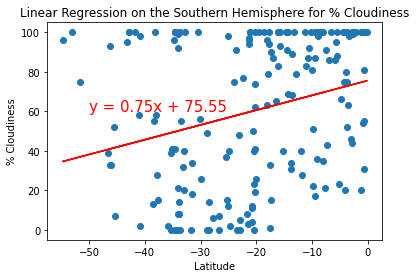

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

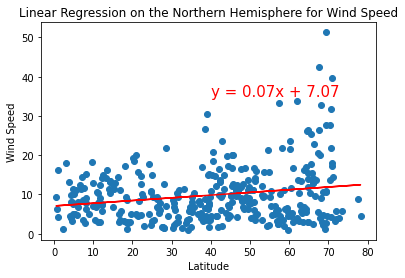

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

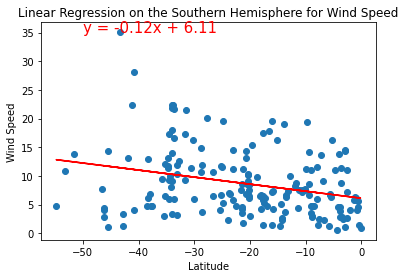

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))